In [3]:
'''Imports'''
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import math
from numpy import linalg as LA
from numba import njit

In [4]:
'''Functions'''
def hamiltonian(hx):
    H=np.array([[-1, -hx], [-hx, 1]], dtype=complex)
    return H


#Calculate the exponential of a matrix using taylor expansion
def taylor_expand(matrix, terms):
    current_term=np.identity(len(matrix), dtype=complex)
    final_term=np.identity(len(matrix), dtype=complex)
    for ii in range(1, terms):
        current_term=current_term@matrix
        final_term+=(current_term/math.factorial(ii))
    return final_term
    
    
#The time evolution unitary operator
def U(hx, dt):
    arg=1j*hamiltonian(hx)*dt
    return taylor_expand(arg, 15)


#Groundstate eigenvector finder
def eigenvector(hx):
    e, v=LA.eigh(hamiltonian(hx))
    return v[:,0]


#Return the fidelity of the current state and the target state
def fidelity(current_state):
    #Identify the grounstate of the target
    target_state=eigenvector(2)
    #Calculate inner product
    fid=np.abs(current_state.conj().T @ target_state)**2
    return fid


#Evolve the given starting state according to the current hamiltonian
def evolve(h_array, dt):
    #Generate array to hold evolution of psi
    psi_array=np.zeros((len(h_array),2), dtype=complex)
    #Boundary condition
    psi_array[0,:]=eigenvector(-2)
    #Evolution loop 
    for ii in range(1, len(h_array)):
        psi_array[ii, :] = U(h_array[ii], dt)@psi_array[ii-1,:]
    return psi_array


#Apply GD to improve the current estimation of hx(t)
def learn(h_array, learning_rate, derivative_spacing, dt):
    #Learn from the current array using the gradient 
    #Apply GD to each element of the h array
    #New array to hold the updated h values
    h_new=np.zeros(len(h_array))
    for ii in range(len(h_array)):
        h_plus=h_array.copy()
        h_minus=h_array.copy()
        h_plus[ii]+=derivative_spacing
        h_minus[ii]-=derivative_spacing
        
        #Psi array for these given h displaced arrays
        psi_placeholder=evolve(h_plus, dt)
        psi_plus=psi_placeholder[-1,:]
        psi_placeholder=evolve(h_minus, dt)
        psi_minus=psi_placeholder[-1,:]
        
        #Fidelity differences
        fid_plus=fidelity(psi_plus)
        fid_minus=fidelity(psi_minus)
        
        #Finite difference calculation
        d_fidelity=(fid_plus/(2*derivative_spacing)) - (fid_minus/(2*derivative_spacing))
        step_size=d_fidelity*learning_rate
        
        #Perform difference 
        h_new[ii]=h_array[ii]+step_size
        if h_new[ii]>2:
            h_new[ii]=2
        elif h_new[ii]<-2:
            h_new[ii]=-2
    
    return h_new

In [5]:
'''Variables and constants'''
dt=0.005
times=np.arange(0, 0.5+dt, dt)
learning_rate=20
derivative_spacing=0.01
iterations=int(1e3)
fidelities=np.zeros(iterations)

#Initialise random h_array
h_array=np.random.uniform(-2,2,(len(times),1))

In [6]:
'''Learning loop'''
for ii in range(iterations):
    #Find the current fidelity
    fidelities[ii]=fidelity(evolve(h_array, dt)[-1,:])
    
    #Update the h array
    h_array=learn(h_array, learning_rate, derivative_spacing, dt)
    
    print("The current fidelity is \n", fidelities[ii], '\n')

The current fidelity is 
 0.37717222240498205 

The current fidelity is 
 0.37917607602720854 

The current fidelity is 
 0.38115540747676746 

The current fidelity is 
 0.3831169137544133 

The current fidelity is 
 0.38506801188283685 

The current fidelity is 
 0.3870085864738791 

The current fidelity is 
 0.3889385265265979 

The current fidelity is 
 0.3908577254027995 

The current fidelity is 
 0.3927660807998387 

The current fidelity is 
 0.3946633969082521 

The current fidelity is 
 0.3965493655378006 

The current fidelity is 
 0.3984242124531897 

The current fidelity is 
 0.4002878526643134 

The current fidelity is 
 0.40214020533382305 

The current fidelity is 
 0.40398119373555047 

The current fidelity is 
 0.4058107452109404 

The current fidelity is 
 0.4076003256545469 

The current fidelity is 
 0.40936537985016397 

The current fidelity is 
 0.4110998390332473 

The current fidelity is 
 0.4127956441512749 

The current fidelity is 
 0.41446632735023625 

The c

The current fidelity is 
 0.5083023505829783 

The current fidelity is 
 0.5083904029740064 

The current fidelity is 
 0.5084781822398724 

The current fidelity is 
 0.5085654795194895 

The current fidelity is 
 0.5086524501614784 

The current fidelity is 
 0.5087391543224715 

The current fidelity is 
 0.508825592832778 

The current fidelity is 
 0.5089117665195539 

The current fidelity is 
 0.5089976762068704 

The current fidelity is 
 0.5090833227157481 

The current fidelity is 
 0.5091687068642048 

The current fidelity is 
 0.5092534315009558 

The current fidelity is 
 0.5093375930726785 

The current fidelity is 
 0.509421501954526 

The current fidelity is 
 0.5095016170102682 

The current fidelity is 
 0.5095734552632438 

The current fidelity is 
 0.5096450771431573 

The current fidelity is 
 0.5097164834745866 

The current fidelity is 
 0.5097876750727788 

The current fidelity is 
 0.5098586527439092 

The current fidelity is 
 0.5099294172853843 

The current fid

The current fidelity is 
 0.5163298251461749 

The current fidelity is 
 0.5163457747928988 

The current fidelity is 
 0.5163616979546481 

The current fidelity is 
 0.5163775946758823 

The current fidelity is 
 0.5163934650009928 

The current fidelity is 
 0.5164093089743024 

The current fidelity is 
 0.5164251266400594 

The current fidelity is 
 0.5164409180424555 

The current fidelity is 
 0.5164566832256068 

The current fidelity is 
 0.5164724222335626 

The current fidelity is 
 0.5164881351103064 

The current fidelity is 
 0.5165038218997501 

The current fidelity is 
 0.5165194826457453 

The current fidelity is 
 0.5165351173920714 

The current fidelity is 
 0.5165507261824377 

The current fidelity is 
 0.5165663090604902 

The current fidelity is 
 0.5165818660698083 

The current fidelity is 
 0.5165973972539027 

The current fidelity is 
 0.5166120090473114 

The current fidelity is 
 0.5166262365226877 

The current fidelity is 
 0.5166404409821794 

The current f

The current fidelity is 
 0.5180836871168868 

The current fidelity is 
 0.5180883733987491 

The current fidelity is 
 0.5180930542598108 

The current fidelity is 
 0.5180977297202513 

The current fidelity is 
 0.5181023997999474 

The current fidelity is 
 0.5181070645184734 

The current fidelity is 
 0.5181117238951103 

The current fidelity is 
 0.51811637794885 

The current fidelity is 
 0.5181210266983988 

The current fidelity is 
 0.5181256701621924 

The current fidelity is 
 0.5181303083583836 

The current fidelity is 
 0.5181349413048636 

The current fidelity is 
 0.5181395690192624 

The current fidelity is 
 0.5181441915189493 

The current fidelity is 
 0.5181488088210442 

The current fidelity is 
 0.5181534209424173 

The current fidelity is 
 0.5181580278996963 

The current fidelity is 
 0.5181626297092712 

The current fidelity is 
 0.518167226387298 

The current fidelity is 
 0.5181718179497035 

The current fidelity is 
 0.5181764044121915 

The current fide

The current fidelity is 
 0.5186995790110416 

The current fidelity is 
 0.5187014870497351 

The current fidelity is 
 0.5187033937517875 

The current fidelity is 
 0.5187052991211122 

The current fidelity is 
 0.5187072031615677 

The current fidelity is 
 0.5187091058769717 

The current fidelity is 
 0.5187110072710877 

The current fidelity is 
 0.5187129073476318 

The current fidelity is 
 0.5187148061102795 

The current fidelity is 
 0.5187167035626539 

The current fidelity is 
 0.5187185997083367 

The current fidelity is 
 0.5187204945508628 

The current fidelity is 
 0.518722388093727 

The current fidelity is 
 0.5187242803403771 

The current fidelity is 
 0.5187261712942203 

The current fidelity is 
 0.5187280609586216 

The current fidelity is 
 0.5187299493369038 

The current fidelity is 
 0.518731836432349 

The current fidelity is 
 0.5187337222482025 

The current fidelity is 
 0.5187356067876685 

The current fidelity is 
 0.5187374900539088 

The current fid

The current fidelity is 
 0.5189716776681451 

The current fidelity is 
 0.518972716982767 

The current fidelity is 
 0.5189737558749785 

The current fidelity is 
 0.5189747943449626 

The current fidelity is 
 0.5189758323929062 

The current fidelity is 
 0.5189768700189948 

The current fidelity is 
 0.5189779072234124 

The current fidelity is 
 0.518978944006344 

The current fidelity is 
 0.5189799803679761 

The current fidelity is 
 0.5189810163084946 

The current fidelity is 
 0.5189820518280815 

The current fidelity is 
 0.5189830869269221 

The current fidelity is 
 0.5189841216052027 

The current fidelity is 
 0.5189851558631056 

The current fidelity is 
 0.5189861897008157 

The current fidelity is 
 0.5189872231185179 

The current fidelity is 
 0.5189882561163958 

The current fidelity is 
 0.5189892886946329 

The current fidelity is 
 0.5189903208534139 

The current fidelity is 
 0.5189913525929224 

The current fidelity is 
 0.5189923839133405 

The current fid

<IPython.core.display.Javascript object>


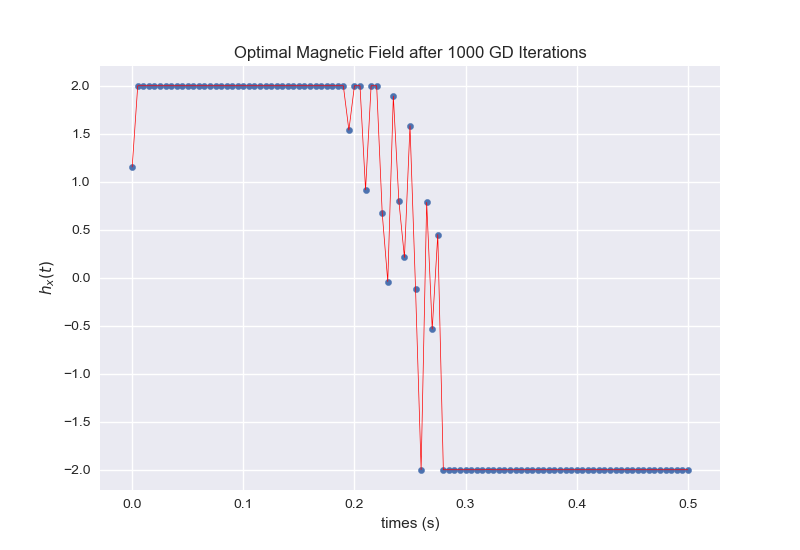

Text(0.5, 1.0, 'Optimal Magnetic Field after 1000 GD Iterations')

In [19]:
%matplotlib notebook
plt.scatter(times, h_array, s=20)
plt.plot(times, h_array, lw=0.5, c='r')
plt.ylabel(r'$h_x(t)$')
plt.xlabel('times (s)')
plt.title('Optimal Magnetic Field after 1000 GD Iterations')

<IPython.core.display.Javascript object>


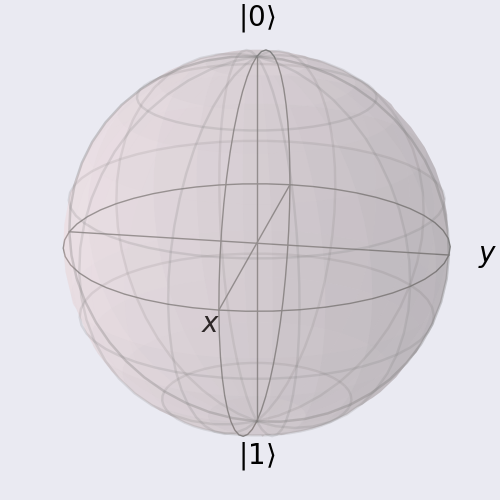

In [22]:
'''Plotting on the Bloch sphere'''
from qutip import *
b=Bloch()
b.show()

[-0.85065081-0.j -0.52573111-0.j]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.85065081]
 [-0.52573111]]


<IPython.core.display.Javascript object>


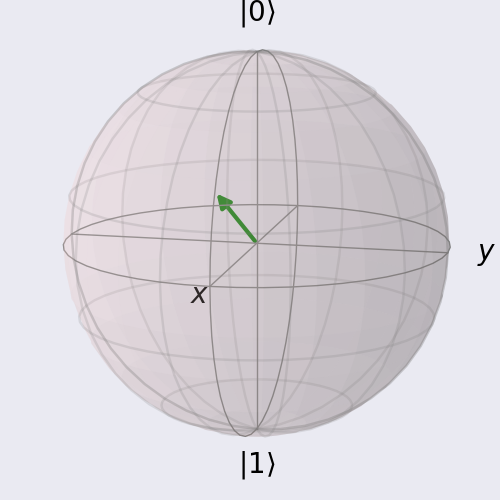

In [29]:
target_state=eigenvector(2)
print(target_state)
q_targ=Qobj(target_state)
print(q_targ)

b.add_states(q_targ)
b.show()